Prueba Final - Fundamentos de Data Science

ACTIVIDAD 2. Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de los alumnos dos escuelas para perfilar a los estudiantes.
De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno (de famrel a health) y ver si éstas se pueden abstraer en categorías latentes.

PRELIMINARES
Luego de importar las librerias, realizare el analisis descriptivo y recodificare las variables necesarias. Luego buscare las categorias latentes solicitadas y a partir de alli realizare las modelaciones descriptivas necesarias para G1,G2 y G3. Por último realizare la modelación predictiva de G3.
Importare la tríada clásica (numpy-matplotlib-pandas), seaborn, scipy stats para simular y statsmodels para modelación. Además factor_analyzer y missigno que me permitirar realizar el analisi factorial para encontrar las variables latentes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn.metrics import roc_curve
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import factor_analyzer as factor
import missingno as msngo
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize']=(6,3)
plt.rcParams['figure.dpi']=200

In [2]:
#importe la base de datos con pandas y explicitare el encoding y los delimitadores. 
df=pd.read_csv('students.csv', sep='|', encoding='ISO-8859-3')

In [3]:
#eliminare la columna innecesaria
df=df.drop('Unnamed: 0',axis=1)

In [4]:
#transforme los valores perdidos que estaban contenidos en la base de datos como ? 
df [df == 'nulidade'] = np.nan 
df [df == 'sem validade'] = np.nan 
df [df == 'zero'] = np.nan
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10
5,GP,M,"""16""",U,LE3,T,4,3,services,other,...,5,4,"""2""",1,2,"""5""",10,15,15,15
6,GP,M,"""16""",U,LE3,T,2,2,other,other,...,4,4,"""4""",1,1,"""3""",0,12,12,11
7,GP,F,"""17""",U,GT3,A,4,4,other,teacher,...,4,1,"""4""",1,1,"""1""",6,6,5,6
8,GP,M,"""15""",U,LE3,A,3,2,services,other,...,4,2,"""2""",1,1,"""1""",0,16,18,19
9,GP,M,"""15""",U,GT3,T,3,4,other,other,...,5,5,"""1""",1,1,"""5""",0,14,15,15


DESCRIPCIÓN

A continuación realizare un análisis exploratorio de los datos.

La base de datos se compone de 395 observaciones y 33 columnas.

In [242]:
#Utilizare shape para extraer la cantidad de observaciones y las columnas
print("La base de datos tiene ", df.shape[0], "observaciones y ", df.shape[1], " columnas")
#Con .columns puedo saber los nombres de las columnas.
print("Las variables de la base de datos son ", df.columns)

La base de datos tiene  395 observaciones y  33  columnas
Las variables de la base de datos son  Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [5]:
#modificare las columnas de valores enteros que fueron codificadas como strings
df['age']=list(map(lambda x: str(x).replace('"',''),df['age']))

In [6]:
df['goout']=list(map(lambda x: str(x).replace('"',''),df['goout']))

In [7]:
df['health']=list(map(lambda x: str(x).replace('"',''),df['health']))

Buscare las medidas descriptivas de las variables mediante value_counts(). 

In [8]:
df['age'].value_counts()

16     101
17      98
15      82
18      81
19      24
nan      4
20       3
22       1
21       1
Name: age, dtype: int64

In [9]:
df['school'].value_counts()

GP    345
MS     45
Name: school, dtype: int64

In [10]:
df['sex'].value_counts()

F    206
M    186
Name: sex, dtype: int64

In [11]:
df['address'].value_counts()

U    305
R     88
Name: address, dtype: int64

In [12]:
df['famsize'].value_counts()

GT3    278
LE3    113
Name: famsize, dtype: int64

In [13]:
df['Pstatus'].value_counts()

T    349
A     40
Name: Pstatus, dtype: int64

In [14]:
df['Medu'].value_counts()

4    129
2    103
3     98
1     59
0      3
Name: Medu, dtype: int64

In [15]:
df['Fedu'].value_counts()

2    112
3    100
4     95
1     81
0      2
Name: Fedu, dtype: int64

In [16]:
df['Mjob'].value_counts()

other       138
services    102
at_home      59
teacher      57
health       33
Name: Mjob, dtype: int64

In [17]:
df['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [18]:
df['reason'].value_counts()

course        144
home          108
reputation    103
other          36
Name: reason, dtype: int64

In [19]:
df['guardian'].value_counts()

mother    270
father     89
other      32
Name: guardian, dtype: int64

In [20]:
df['traveltime'].value_counts()

1    254
2    107
3     23
4      8
Name: traveltime, dtype: int64

In [21]:
df['studytime'].value_counts()

2    194
1    104
3     65
4     27
Name: studytime, dtype: int64

In [22]:
df['failures'].value_counts()

0    308
1     49
2     17
3     16
Name: failures, dtype: int64

In [23]:
df['schoolsup'].value_counts()

no     337
yes     50
Name: schoolsup, dtype: int64

In [24]:
df['famsup'].value_counts()

yes    239
no     151
Name: famsup, dtype: int64

In [25]:
df['paid'].value_counts()

no     214
yes    180
Name: paid, dtype: int64

In [26]:
df['activities'].value_counts()

yes    199
no     191
Name: activities, dtype: int64

In [27]:
df['nursery'].value_counts()

yes    309
no      80
Name: nursery, dtype: int64

In [28]:
df['higher'].value_counts()

yes    369
no      20
Name: higher, dtype: int64

In [29]:
df['internet'].value_counts()

yes    327
no      65
Name: internet, dtype: int64

In [30]:
df['romantic'].value_counts()

no     262
yes    131
Name: romantic, dtype: int64

In [31]:
df['famrel'].value_counts()

4    194
5    105
3     65
2     18
1      8
Name: famrel, dtype: int64

In [32]:
df['freetime'].value_counts()

3    157
4    114
2     64
5     39
1     19
Name: freetime, dtype: int64

In [33]:
df['goout'].value_counts()

3      128
2      103
4       83
5       53
1       23
nan      5
Name: goout, dtype: int64

In [34]:
df['Dalc'].value_counts()

1    274
2     74
3     26
4      9
5      9
Name: Dalc, dtype: int64

In [35]:
df['Walc'].value_counts()

1    150
2     82
3     79
4     51
5     28
Name: Walc, dtype: int64

In [36]:
df['health'].value_counts()

5      145
3       91
4       66
2       45
1       44
nan      4
Name: health, dtype: int64

In [37]:
df['absences'].describe()

count     391
unique     34
top         0
freq      113
Name: absences, dtype: object

In [38]:
#Recodifique las variables con los comandos replace y np.where según lo pedido por la consigna
df['school']=df['school'].replace(['MS','GP'],[1,0])
df['sex']=df['sex'].replace(['M','F'],[1,0])
df['address']=df['address'].replace(['R','U'],[1,0])
df['famsize']=df['famsize'].replace(['GT3','LE3'],[1,0])
df['Pstatus']=df['Pstatus'].replace(['A','T'],[1,0])
df['Mjob']=df['Mjob'].replace(['health','teacher','at_home','services','other'],[0,1,2,3,4])
df['Fjob']=df['Fjob'].replace(['health','at_home','teacher','services','other'],[0,1,2,3,4])
df['reason']=df['reason'].replace(['other','reputation','home','course'],[0,1,2,3])
df['guardian']=df['guardian'].replace(['other','father','mother'],[0,1,2])
df['schoolsup']=df['schoolsup'].replace(['yes','no'],[1,0])
df['famsup']=df['famsup'].replace(['no','yes'],[1,0])
df['paid']=df['paid'].replace(['yes','no'],[1,0])
df['activities']=df['activities'].replace(['no','yes'],[1,0])
df['nursery']=df['nursery'].replace(['no','yes'],[1,0])
df['higher']=df['higher'].replace(['no','yes'],[1,0])
df['internet']=df['internet'].replace(['no','yes'],[1,0])
df['romantic']=df['romantic'].replace(['yes','no'],[1,0])

In [39]:
#convertire los valores del df en float para poder realizar las modelaciones
df=df.astype(float)

In [101]:
#seleccionare las variables dentro de las cuales se quiere buscar las categorias latentes.
dat=df.loc[:,'famrel':'health']
dat

,famrel,freetime,goout,Dalc,Walc,health
0,4.0,3.0,4.0,1.0,1.0,3.0
1,5.0,3.0,3.0,1.0,1.0,3.0
2,4.0,3.0,2.0,2.0,3.0,3.0
3,3.0,2.0,2.0,1.0,1.0,5.0
4,4.0,3.0,2.0,1.0,2.0,5.0
5,5.0,4.0,2.0,1.0,2.0,5.0
6,4.0,4.0,4.0,1.0,1.0,3.0
7,4.0,1.0,4.0,1.0,1.0,1.0
8,4.0,2.0,2.0,1.0,1.0,1.0
9,5.0,5.0,1.0,1.0,1.0,5.0


In [102]:
#realizare un recorrido por las columnas en busca de valores perdidos.
for i in dat.columns:
    print()
    print(i)
    print(round(len(dat[dat[i].isnull()])/len(dat),3))


famrel
0.013

freetime
0.005

goout
0.013

Dalc
0.008

Walc
0.013

health
0.01


<Figure size 288x288 with 0 Axes>

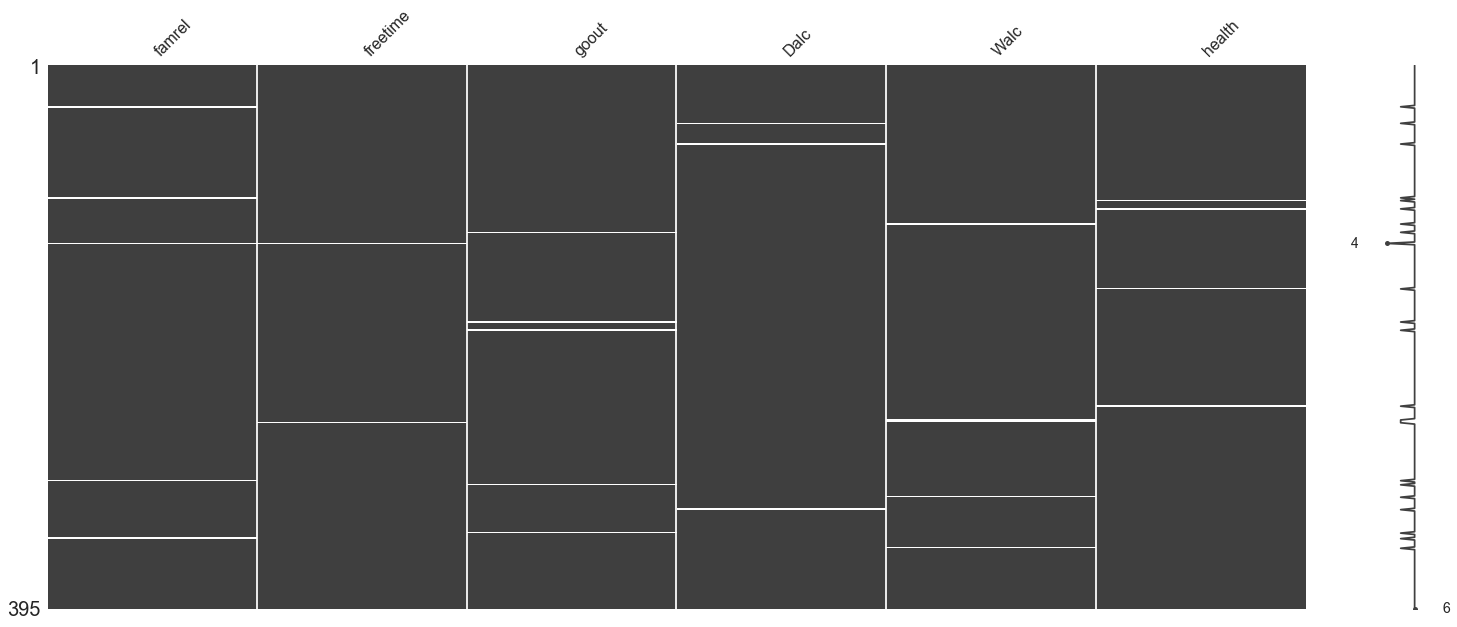

In [103]:
#La función matrix dentro de la librería missingno permite visualizar la matriz de datos, 
#las líneas en blanco representan respuestas perdidas (o negadas) por el encuestado.
plt.figure(figsize=(4,4))
msngo.matrix(dat)

In [104]:
#Analizare las correlaciones con heatmap de seaborn
dat=dat.dropna()
corr=dat.corr()

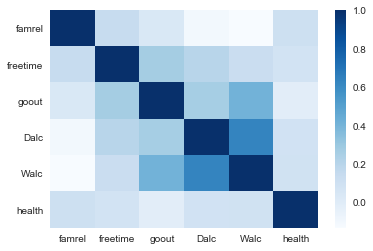

In [105]:
sns.heatmap(corr, cmap='Blues')

- Dalc y Walc son las variables con mayor correlación.

Ahora debemos preguntarnos si nuestra matriz de correlaciones está relacionada con una matriz de identidad, para ello aplicamos la 'Prueba de esferacidad de errores de Bartlett' que nos devuelve un chi-square y un p-value.

In [106]:
factor.calculate_bartlett_sphericity(dat)

(329.2540574318696, 2.175126188291115e-61)

De manera adicional a la prueba de Bartlett, podemos medir si las correlaciones parciales dentro de la matriz son cercanas a 0. De ser este el caso, la prueba sugiere la existencia de por lo menos un factor latente dentro de la batería de preguntas.
Se puede implementar mediante el método calculate_kmo de la librería factor_analyzer. El método devuelve el puntaje KMO para cada item dentro de la batería, así como un puntaje global para todos los items.

In [107]:
factor.calculate_kmo(dat)

(               KMO
 famrel    0.525827
 freetime  0.592118
 goout     0.625819
 Dalc      0.584804
 Walc      0.557228
 health    0.522971, 0.5783529597446159)

Posterior al análisis de la ideonidad de nuestra matriz de datos para el análisis factorial, la siguiente pregunta a responder es ¿qué tantos factores necesitamos?
Para ello podemos analizar los valores propios (eigenvalues) de la decomposición de la matriz. Estos informan qué tanta varianza se puede atribuir un factor en específico. Mediante la definición de qué tantos factores necesitamos para caracterizar una matriz podemos obtener una estructura parsimoniosa e interpretable.
La manera más simple de analizar esto es mediate un scree plot, que visualiza los eigenvalues en la medida que se aumenta la cantidad de factores. Por convención no pueden existir más factores que variables dentro de la matriz.

Text(0.5,1,'Screen plot')

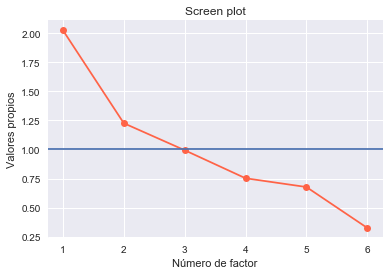

In [243]:
factorize=factor.FactorAnalyzer()
factorize.analyze(data=dat, n_factors=5)
factor_screenplot= factorize.get_eigenvalues()[0]
plt.plot(factor_screenplot.index+1,factor_screenplot.values,'o-',color='tomato')
plt.xlabel('Número de factor')
plt.ylabel('Valores propios')
plt.axhline(1)
plt.title('Screen plot')

Text(0.5,1,'Screen plot')

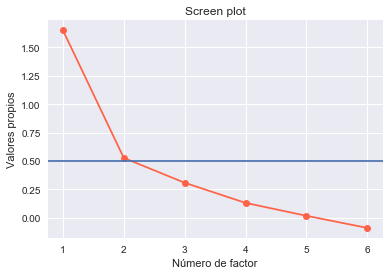

In [244]:
factorize1=factor.FactorAnalyzer()
factorize1.analyze(data=dat, n_factors=2)
factor_screenplot= factorize.get_eigenvalues()[0]
plt.plot(factor_screenplot.index+1,factor_screenplot.values,'o-',color='tomato')
plt.xlabel('Número de factor')
plt.ylabel('Valores propios')
plt.axhline(0.5)
plt.title('Screen plot')

Para extraer los resultados sobre qué preguntas están asociadas entre sí, podemos solicitar las cargas  λλ  en cada factor con factorize.loading. Unicamente tomare los valores mayores a .4

In [120]:
factor_loadings=factorize1.loadings

In [121]:
factor_loadings.applymap(lambda x: np.where(x < .4, '', round(x,2)))

,Factor1,Factor2
famrel,,
freetime,,0.66
goout,,
Dalc,0.65,
Walc,1.04,
health,,


Se pueden extraer los puntajes estimados entre ambos elementos mediante el método get_scores para cada factor generado.

In [79]:
extract_factor_scores=factorize1.get_scores(dat)

In [80]:
#eliminare los valores perdidos
dfdropna=df.dropna()

In [122]:
#agregare los factores al df
dfdropna['factor1']=extract_factor_scores.loc[:, 'Factor1']
dfdropna['factor2']=extract_factor_scores.loc[:, 'Factor2']
dfdropna

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,factor1,factor2,factor3,factor4
1,0.0,0.0,17.0,0.0,1.0,0.0,1.0,1.0,2.0,4.0,...,1.0,3.0,4.0,5.0,5.0,6.0,-1.631948,0.467634,0.561758,-0.251676
3,0.0,0.0,15.0,0.0,1.0,0.0,4.0,2.0,0.0,3.0,...,1.0,5.0,2.0,15.0,14.0,15.0,0.682273,-0.623722,1.035121,-0.670927
5,0.0,1.0,16.0,0.0,0.0,0.0,4.0,3.0,3.0,4.0,...,2.0,5.0,10.0,15.0,15.0,15.0,1.251015,-0.625401,0.683931,-0.112800
6,0.0,1.0,16.0,0.0,0.0,0.0,2.0,2.0,4.0,4.0,...,1.0,3.0,0.0,12.0,12.0,11.0,-0.132155,-1.125545,1.096252,-0.690134
7,0.0,0.0,17.0,0.0,1.0,1.0,4.0,4.0,4.0,2.0,...,1.0,1.0,6.0,6.0,5.0,6.0,1.106604,-1.207974,0.777195,-0.523675
8,0.0,1.0,15.0,0.0,0.0,1.0,3.0,2.0,3.0,4.0,...,1.0,1.0,0.0,16.0,18.0,19.0,-0.777273,-1.151972,-1.015831,0.255700
9,0.0,1.0,15.0,0.0,1.0,0.0,3.0,4.0,4.0,4.0,...,1.0,5.0,0.0,14.0,15.0,15.0,1.121910,0.129960,-0.365684,-0.763241
11,0.0,0.0,15.0,0.0,1.0,0.0,2.0,1.0,3.0,4.0,...,1.0,4.0,4.0,10.0,12.0,12.0,-0.230834,-0.748432,-2.232086,-0.542371
12,0.0,1.0,15.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,...,3.0,5.0,2.0,14.0,14.0,14.0,1.430302,-0.017066,0.602082,-0.839247
13,0.0,1.0,15.0,0.0,1.0,0.0,4.0,3.0,1.0,4.0,...,2.0,3.0,2.0,10.0,10.0,11.0,1.308815,-0.694443,0.699613,-0.795244


MODELACIÓN DESCRIPTIVA

La regresión lineal se puede aplicar en el caso donde nuestra variable objetivo (o dependiente) es contínua y la relación entre esta y los atributos (o variables independientes) es mediante una combinación lineal de los últimos.

In [139]:
#generamos un objeto con el modelo y que genere las estimaciones
model1 =smf.ols('G1 ~ school+sex+age+address+famsize+Pstatus+Medu+Fedu+Mjob+Fjob+reason+guardian+traveltime+studytime+failures+famrel+health+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic+absences+factor1+factor2+G2+G3',data =dfdropna).fit()

In [140]:
#solicitamos los resultados
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     22.39
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           3.02e-45
Time:                        18:09:58   Log-Likelihood:                -390.57
No. Observations:                 209   AIC:                             841.1
Df Residuals:                     179   BIC:                             941.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3120      2.706      0.485      0.628      -4.028       6.652
school      2.406e-14    1.3e-14      1.844      0.067   -1.69e-15    4.98e-14
sex            0.0029      0.278      0.010      0.992      -0.546       0.552
age            0.0397      0.136      0.292      0.770      -0.228       0.307
address        0.5611      0.332      1.691      0.093      -0.094       1.216
famsize        0.0334      0.305      0.110      0.913      -0.568       0.635
Pstatus       -0.3795      0.422     -0.899      0.370      -1.213       0.454
Medu          -0.0419      0.175     -0.240      0.811      -0.387       0.303
Fedu           0.3029      0.165      1.834      0.068      -0.023       0.629
Mjob           0.0289      0.107      0.269      0.788      -0.183       0.241
Fjob          -0.2476      0.131     -1.887      0.061      -0.506       0.011
reason         0.2193      0.130      1.687      0.093      -0.037       0.476
guardian       0.3048      0.249      1.222      0.223      -0.188       0.797
traveltime     0.1984      0.197      1.005      0.316      -0.191       0.588
studytime      0.1673      0.165      1.016      0.311      -0.158       0.492
failures      -0.3099      0.185     -1.680      0.095      -0.674       0.054
famrel         0.0330      0.149      0.222      0.825      -0.260       0.326
health         0.0512      0.095      0.540      0.590      -0.136       0.239
schoolsup     -1.2219      0.345     -3.540      0.001      -1.903      -0.541
famsup         0.3395      0.277      1.226      0.222      -0.207       0.886
paid          -0.5032      0.268     -1.879      0.062      -1.032       0.025
activities     0.3849      0.249      1.546      0.124      -0.106       0.876
nursery       -0.1540      0.325     -0.474      0.636      -0.794       0.486
higher        -1.0705      0.612     -1.749      0.082      -2.278       0.137
internet       0.0174      0.347      0.050      0.960      -0.668       0.703
romantic       0.4164      0.287      1.450      0.149      -0.150       0.983
absences      -0.0079      0.016     -0.502      0.616      -0.039       0.023
factor1       -0.0781      0.143     -0.545      0.586      -0.361       0.205
factor2        0.1724      0.140      1.229      0.221      -0.104       0.449
G2             0.5118      0.087      5.890      0.000       0.340       0.683
G3             0.1675      0.077      2.180      0.031       0.016       0.319
==============================================================================
Omnibus:                       11.359   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.502
Skew:                           0.344   Prob(JB):                     0.000261
Kurtosis:                       4.193   Cond. No.                     1.02e+16
==

- Evaluare el Adj. R-squared y los  p-value del modelo y apartir de alli comenzare a discriminar las variables hasta encontrar el modelo que mejor describa la variable dependiente. Lo repetire también con las variables G2 y G3 

In [141]:
model1_1 =smf.ols('G1 ~ schoolsup+G2+G3',data =dfdropna).fit()
model1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     268.0
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           5.85e-82
Time:                        18:12:44   Log-Likelihood:                -548.42
No. Observations:                 284   AIC:                             1105.
Df Residuals:                     280   BIC:                             1119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5379      0.312     11.352      0.000       2.924       4.151
schoolsup     -1.1508      0.295     -3.906      0.000      -1.731      -0.571
G2             0.5662      0.061      9.214      0.000       0.445       0.687
G3             0.1466      0.051      2.879      0.004       0.046       0.247
==============================================================================
Omnibus:                       61.124   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.489
Skew:                           0.928   Prob(JB):                     3.19e-41
Kurtosis:                       6.509   Cond. No.                         54.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Las variables determinantes para G1 son: schoolsup, G2 y G3

In [142]:
model2 =smf.ols('G2 ~ school+sex+age+address+famsize+Pstatus+Medu+Fedu+Mjob+Fjob+reason+guardian+traveltime+studytime+failures+famrel+health+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic+absences+factor1+factor2+G1+G3',data =dfdropna).fit()

In [143]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     58.64
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           2.90e-76
Time:                        18:13:28   Log-Likelihood:                -340.57
No. Observations:                 209   AIC:                             741.1
Df Residuals:                     179   BIC:                             841.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8138      2.087      2.786      0.006       1.696       9.932
school     -1.035e-13   3.73e-14     -2.774      0.006   -1.77e-13   -2.99e-14
sex            0.0801      0.219      0.366      0.715      -0.352       0.512
age           -0.2091      0.106     -1.979      0.049      -0.418      -0.001
address       -0.3187      0.262     -1.215      0.226      -0.836       0.199
famsize       -0.1360      0.240     -0.567      0.572      -0.609       0.337
Pstatus       -0.1894      0.333     -0.569      0.570      -0.846       0.467
Medu          -0.0802      0.137     -0.583      0.560      -0.351       0.191
Fedu          -0.0245      0.131     -0.187      0.852      -0.283       0.234
Mjob          -0.0260      0.084     -0.308      0.758      -0.193       0.141
Fjob           0.0392      0.104      0.376      0.707      -0.166       0.245
reason        -0.1080      0.103     -1.050      0.295      -0.311       0.095
guardian      -0.0316      0.197     -0.160      0.873      -0.421       0.358
traveltime    -0.1823      0.155     -1.174      0.242      -0.489       0.124
studytime      0.0679      0.130      0.523      0.602      -0.188       0.324
failures       0.2241      0.145      1.540      0.125      -0.063       0.511
famrel        -0.2195      0.116     -1.895      0.060      -0.448       0.009
health        -0.0575      0.075     -0.770      0.442      -0.205       0.090
schoolsup      0.2738      0.280      0.977      0.330      -0.279       0.827
famsup         0.0713      0.219      0.326      0.745      -0.360       0.503
paid           0.2085      0.212      0.982      0.328      -0.211       0.627
activities    -0.1469      0.197     -0.746      0.457      -0.536       0.242
nursery       -0.2161      0.255     -0.847      0.398      -0.720       0.287
higher         0.9792      0.480      2.038      0.043       0.031       1.927
internet      -0.3605      0.272     -1.325      0.187      -0.897       0.176
romantic      -0.1084      0.227     -0.477      0.634      -0.557       0.340
absences      -0.0118      0.012     -0.958      0.339      -0.036       0.013
factor1       -0.0495      0.113     -0.439      0.661      -0.272       0.173
factor2       -0.0680      0.111     -0.615      0.540      -0.287       0.150
G1             0.3172      0.054      5.890      0.000       0.211       0.423
G3             0.6256      0.040     15.791      0.000       0.547       0.704
==============================================================================
Omnibus:                       62.067   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.869
Skew:                           0.979   Prob(JB):                     2.64e-79
Kurtosis:                       9.142   Cond. No.                     2.25e+15
==

In [145]:
model2_1 =smf.ols('G2 ~ school+age+famrel+higher+G1+G3',data =dfdropna).fit()
model2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     289.2
Date:                Sun, 30 Dec 2018   Prob (F-statistic):          3.88e-116
Time:                        18:17:28   Log-Likelihood:                -499.23
No. Observations:                 284   AIC:                             1012.
Df Residuals:                     277   BIC:                             1038.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5645      1.286      1.994      0.047       0.033       5.096
school        -0.2089      0.277     -0.754      0.451      -0.754       0.336
age           -0.0387      0.074     -0.522      0.602      -0.185       0.107
famrel        -0.2589      0.097     -2.672      0.008      -0.450      -0.068
higher         0.0124      0.386      0.032      0.974      -0.748       0.773
G1             0.3979      0.044      9.124      0.000       0.312       0.484
G3             0.5214      0.032     16.402      0.000       0.459       0.584
==============================================================================
Omnibus:                       35.942   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.067
Skew:                           0.220   Prob(JB):                     1.79e-45
Kurtosis:                       7.150   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
model2_2 =smf.ols('G2 ~ famrel+G1+G3',data =dfdropna).fit()
model2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     581.2
Date:                Sun, 30 Dec 2018   Prob (F-statistic):          6.91e-120
Time:                        18:18:09   Log-Likelihood:                -499.96
No. Observations:                 284   AIC:                             1008.
Df Residuals:                     280   BIC:                             1023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8699      0.476      3.924      0.000       0.932       2.808
famrel        -0.2540      0.096     -2.650      0.009      -0.443      -0.065
G1             0.3959      0.043      9.199      0.000       0.311       0.481
G3             0.5237      0.031     16.860      0.000       0.463       0.585
==============================================================================
Omnibus:                       36.072   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.062
Skew:                           0.281   Prob(JB):                     8.82e-42
Kurtosis:                       6.957   Cond. No.                         94.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
#Las variables determinantes para G2 son: famrel, G1 y G3

In [149]:
model3 =smf.ols('G3 ~ school+sex+age+address+famsize+Pstatus+Medu+Fedu+Mjob+Fjob+reason+guardian+traveltime+studytime+failures+famrel+health+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic+absences+factor1+factor2+G2+G1',data =dfdropna).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     50.76
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           2.58e-71
Time:                        18:19:30   Log-Likelihood:                -382.05
No. Observations:                 209   AIC:                             824.1
Df Residuals:                     179   BIC:                             924.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0320      2.582     -1.561      0.120      -9.127       1.063
school      5.203e-14   3.31e-14      1.573      0.118   -1.33e-14    1.17e-13
sex            0.0599      0.267      0.224      0.823      -0.467       0.587
age            0.1373      0.130      1.058      0.292      -0.119       0.393
address       -0.1237      0.321     -0.385      0.701      -0.757       0.510
famsize        0.1761      0.292      0.602      0.548      -0.401       0.753
Pstatus        0.4738      0.405      1.170      0.243      -0.325       1.272
Medu           0.1639      0.167      0.980      0.329      -0.166       0.494
Fedu          -0.1842      0.159     -1.155      0.250      -0.499       0.130
Mjob           0.0405      0.103      0.393      0.695      -0.163       0.244
Fjob           0.0338      0.127      0.266      0.791      -0.217       0.285
reason        -0.0758      0.126     -0.603      0.547      -0.324       0.172
guardian      -0.0762      0.240     -0.317      0.752      -0.551       0.398
traveltime     0.1318      0.190      0.694      0.488      -0.243       0.506
studytime     -0.1839      0.158     -1.165      0.246      -0.496       0.128
failures      -0.3710      0.176     -2.103      0.037      -0.719      -0.023
famrel         0.2591      0.141      1.833      0.069      -0.020       0.538
health        -0.0306      0.091     -0.335      0.738      -0.211       0.149
schoolsup      0.0673      0.343      0.196      0.845      -0.609       0.744
famsup        -0.1494      0.267     -0.560      0.576      -0.676       0.377
paid           0.0713      0.260      0.275      0.784      -0.441       0.584
activities    -0.1537      0.240     -0.640      0.523      -0.628       0.321
nursery        0.2096      0.311      0.673      0.502      -0.405       0.824
higher        -0.9465      0.588     -1.609      0.109      -2.108       0.215
internet       0.4226      0.332      1.273      0.205      -0.233       1.078
romantic      -0.2902      0.276     -1.049      0.295      -0.836       0.255
absences       0.0233      0.015      1.550      0.123      -0.006       0.053
factor1        0.1001      0.137      0.728      0.467      -0.171       0.371
factor2       -0.0109      0.135     -0.081      0.936      -0.278       0.256
G2             0.9305      0.059     15.791      0.000       0.814       1.047
G1             0.1544      0.071      2.180      0.031       0.015       0.294
==============================================================================
Omnibus:                      143.506   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1399.564
Skew:                          -2.564   Prob(JB):                    1.23e-304
Kurtosis:                      14.594   Cond. No.                     2.25e+15
==

In [155]:
model3_1 =smf.ols('G3 ~ failures+famrel+G1+G2',data =dfdropna).fit()
model3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     333.9
Date:                Sun, 30 Dec 2018   Prob (F-statistic):          4.98e-105
Time:                        18:38:55   Log-Likelihood:                -584.45
No. Observations:                 284   AIC:                             1179.
Df Residuals:                     279   BIC:                             1197.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7211      0.666     -4.086      0.000      -4.032      -1.410
failures      -0.3160      0.165     -1.911      0.057      -0.641       0.009
famrel         0.3452      0.129      2.671      0.008       0.091       0.600
G1             0.1581      0.066      2.402      0.017       0.029       0.288
G2             0.9522      0.057     16.700      0.000       0.840       1.064
==============================================================================
Omnibus:                      192.687   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1590.026
Skew:                          -2.792   Prob(JB):                         0.00
Kurtosis:                      13.158   Cond. No.                         98.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Las variables determinantes para G1 son: failures, famrel, G2 y G3

MODELACIÓN PREDICTIVA

- Para generar un modelo lineal necesitamos el módulo linear_model.
- Posteriormente importamos las métricas de evaluación alojadas en sklearn.metrics

In [182]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [194]:
#determinamos los vectores dependientes e independientes
y_vec=dfdropna.loc[:,'G3']
x_mat=dfdropna.loc[:,'school':'G2']

In [195]:
#El siguiente paso es poder dividir la muestra en cuatro partes
x_train, x_test, y_train, y_test=train_test_split(x_mat, y_vec, test_size=.33,random_state=8058)

In [196]:
#El siguiente paso es la construcción de un objeto que contenga las instrucciones a ejecutar en el modelo. 
#Para el caso de la regresión lineal, esto se genera con la clase LinearRegression() del módulo linear_model.
modelo = linear_model.LinearRegression(fit_intercept=True, normalize=False)

Al generar el objeto con el método LinearRegression(), podemos inicializar la clase de similar manera a como lo hicimos con statsmodels. Para ello, ingresamos el training set X_mat_train e y_train en el método .fit() del objeto modelo.
Cuando pasamos los datos por la función .fit() no es necesario asignar de nuevo el objeto, dado que estamos generando una instancia específica de éste.

In [197]:
modelo.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
# imprimamos la lista de coeficientes 
print("La lista de pendientes: :", modelo.coef_)
# imprimamos el intercepto del modelo
print("El intercepto del modelo es :", modelo.intercept_)

La lista de pendientes: : [ 0.33833784 -0.41548555 -0.07014159 -0.03920568  0.14908377  0.60518919
  0.17004474 -0.23143813  0.02039302  0.08616554 -0.03686966 -0.04247387
  0.01757424 -0.09881374 -0.37210016  0.19788314  0.00518843 -0.0256561
  0.18785083 -0.09808044 -0.2273615   0.07784769 -0.28251979  0.44380337
  0.22478949 -0.19789108 -0.22192814  0.38695826 -0.03272852  0.01983165
  0.22922032  0.88294133]
El intercepto del modelo es : -2.4517615953618392


In [199]:
#generamos las predicciones
earn_yhat = modelo.predict(x_test)
print("La cantidad de predicciones realizadas en X_mat_test son: ", len(earn_yhat))
print("las predicciones son ", earn_yhat)

La cantidad de predicciones realizadas en X_mat_test son:  94
las predicciones son  [13.71241744 11.92490768  7.84803473  8.90053327 13.08333974 15.8454418
 14.01864457  8.2818395   6.87084562 15.02888246 10.18765604  9.96406229
  9.48255405 11.38118469  5.42235933  4.9589891  16.15337351 11.25242439
  6.96451684 17.50862562  9.38452035  8.34120059 -0.88089422  7.45412293
 19.8058175  14.07471282 10.8923108  13.1592167   6.81695045  8.361673
 10.71230599 18.66590913  4.92566316 18.38615759 11.88804315 11.69485026
  2.24767573 14.09496269 15.45778723 11.91547517  9.55029127  7.8989185
 15.47602462  6.34217001  8.56719381  8.45120906 10.44746631 11.49235241
  7.29687161  7.61547344  9.00639228 18.01067501 10.88281874  9.27300343
 12.42317459  5.17743361  9.42271476 10.10034117 18.6737727  10.90886887
 11.35364908 10.33030149 13.13706578  4.13430016 14.96692102 15.80538021
 13.35669832  9.23334816  8.35764749  7.89936341 12.29366296 15.68973976
  7.83380456  6.81270791 14.54766967 14.8664

In [200]:
#generamos las métricas
m1_mse = mean_squared_error(y_test, earn_yhat).round(1)
m1_r2 = r2_score(y_test, earn_yhat).round(2)
print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

Mean Squared Error:  4.7
R-cuadrado:  0.79


La interpretación de R-cuadrado nos dice que nuestra función puede explicar un 79% de la variabilidad de nuestra variable objetivo. El Promedio del Error Cuadrático es que necesitamos compararlo con otro modelo para ver cuál reduce más el error cuadrático. Por eso realizare otro modelo.

In [213]:
# extraemos los nombres de las columnas en la base de datos
columns = dfdropna.columns

# generamos 3 arrays vacíos para guardar los valores
# nombre de la variable
attr_name = []
# correlación de pearson
pearson_r = []
# valor absoluto de la correlación
abs_pearson_r = []

# para cada columna en el array de columnas
for col in columns:
    # si la columna no es la dependiente
    if col != "G3":
        # adjuntar el nombre de la variable en attr_name
        attr_name.append(col)
        # adjuntar la correlación de pearson
        pearson_r.append(dfdropna[col].corr(dfdropna['G3']))
        # adjuntar el absoluto de la correlación de pearson
        abs_pearson_r.append(abs(dfdropna[col].corr(dfdropna['G3'])))
        
# transformamos los arrays en un DataFrame
features = pd.DataFrame({
    'attribute': attr_name,
    'corr':pearson_r,
    'abs_corr':abs_pearson_r
})

# generamos el index con los nombres de las variables
features = features.set_index('attribute')
# ordenamos los valores de forma descendiente
features.sort_values(by=['abs_corr'], ascending=False)

,corr,abs_corr
attribute,,
G2,0.902984,0.902984
G1,0.803384,0.803384
failures,-0.345628,0.345628
goout,-0.221752,0.221752
Medu,0.180326,0.180326
reason,-0.165748,0.165748
higher,-0.162044,0.162044
factor3,-0.153288,0.153288
age,-0.132134,0.132134


In [246]:
#elejiremos las variables cuya correlación sean en superior a 0.30
dataframe=pd.DataFrame({'failures':dfdropna['failures'],'G1':dfdropna['G1'],'G2':dfdropna['G2'],'G3':dfdropna['G3']})

In [238]:
y_vec=dfdropna.loc[:,'G3']
x_mat=dataframe.loc[:,'failures':'G2']

In [239]:
x_train, x_test, y_train, y_test=train_test_split(x_mat, y_vec, test_size=.33,random_state=8058)

In [240]:
purge_model = linear_model.LinearRegression(fit_intercept=True, normalize=True)
purge_model.fit(x_train, y_train)
purge_model_yhat = purge_model.predict(x_test)

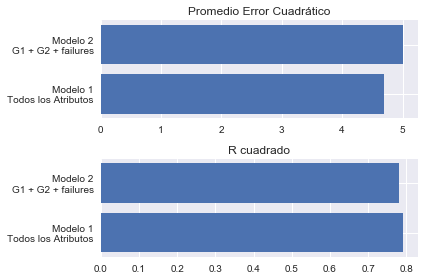

In [241]:
m2_mse = mean_squared_error(y_test, purge_model_yhat).round(0)
m2_r2 = r2_score(y_test, purge_model_yhat).round(2)
plt.subplot(2,1,1)
plt.barh(['Modelo 1\nTodos los Atributos', 'Modelo 2\nG1 + G2 + failures'], [m1_mse, m2_mse])
plt.title("Promedio Error Cuadrático")
plt.subplot(2,1, 2)
plt.barh(['Modelo 1\nTodos los Atributos', 'Modelo 2\nG1 + G2 + failures'], [m1_r2, m2_r2])
plt.title("R cuadrado");
plt.tight_layout()

La diferencia entre ambos modelos es muy poca, el modelo 1 seria preferible ya que posee menor promedio error cuadratico y mayor poder explicativo. Sin embargo el modelo 2 utiliza menor cantidad de información y explica practicamente lo mismo que el modelo 1.